In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

[5]
[2]


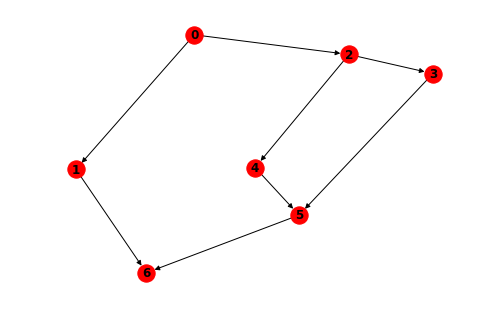

In [223]:
#Degendancy graph init

def initGraph(M):
    N = len(M)
    DG = nx.DiGraph()
    for i in range(0, N):
        for j in range(0, N):
            if (M[i][j] != 0):
                DG.add_edge(i, j)
    return DG

DG_matrix = [
    [0,1,1,0,0,0,0],
    [0,0,0,0,0,0,1],
    [0,0,0,1,1,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0]
]

#DG = nx.DiGraph()
#DG.add_edges_from([(1, 2), (1, 3), (3,4), (3,5), (4,6), (5,6), (6,7), (2,7)]) #1 - start, 7 - end
DG = initGraph(DG_matrix)
print list(DG.successors(3))
print list(DG.predecessors(3))


nx.draw(DG, with_labels=True, font_weight='bold')

Error: weight not defined.
Error: weight not defined.
Error: weight not defined.
Error: weight not defined.
Error: weight not defined.
Error: weight not defined.
[(0, {'weight': 17}), (1, {'weight': 2}), (2, {'weight': 8}), (3, {'weight': 3}), (4, {'weight': 3}), (5, {'weight': 2}), (6, {'weight': 1})]


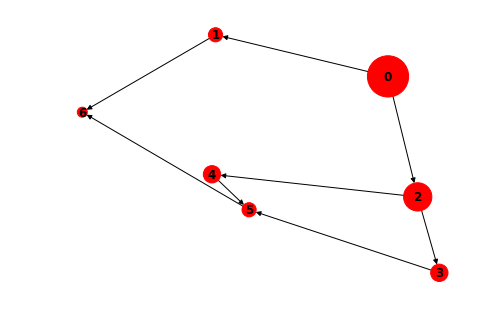

In [211]:
#1 Simple ranking of dependency graph

def resetWeights(DG):
    j = len(DG.nodes)-1
    addWeightToNode(DG, j, 0, reset=True)

def addWeights(DG):
    j = len(DG.nodes)-1
    addWeightToNode(DG, j, 1)

    
def addWeightToNode(DG, j, w, reset=False):
    if (reset):
        DG.add_node(j, weight=0)
    else:
        DG.add_node(j, weight=w)
    preds = list(DG.predecessors(j))
    for i in preds:
        try:
            w_i = DG.nodes[i]['weight']
        except:
            print "Error: weight not defined."
            w_i = 0
        addWeightToNode(DG, i, w+1+w_i, reset)
        
        
resetWeights(DG)        
addWeights(DG)
print DG.nodes.data()
node_sizes = [100*DG.nodes[i]['weight'] for i in range(0, len(DG.nodes))]
nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes)

[0]
[1, 5]


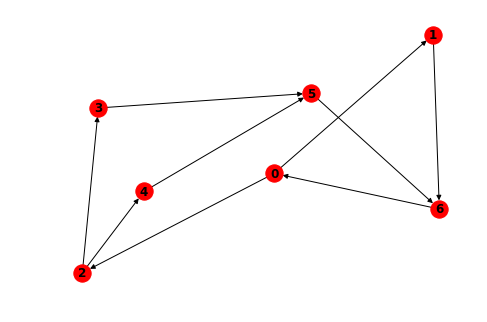

In [240]:
#Cycling graph 1 finish-to-start

def cycleMatrix(M):
    N = len(M)-1
    M_cyc = [row[:] for row in M]
    M_cyc[N][0] = 1
    return M_cyc

DG_cyc_matrix = cycleMatrix(DG_matrix)
DG_cyc = initGraph(DG_cyc_matrix)
print list(DG_cyc.successors(6))
print list(DG_cyc.predecessors(6))

nx.draw(DG_cyc, with_labels=True, font_weight='bold')

In [ ]:
#PageRank for cycled dependency graph

def addWeightsPageRank(DG_cyc):
    